# Encoding, Scaling, Connclusión

### Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored, cprint
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
import category_encoders as ce
import warnings
import sys

### Funciones

In [2]:
sys.path.append('../src/')
import functions as f
sys.path.remove('../src/')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.width', 10000)

In [3]:
# Constantes
seed= 12345

## Carga de datos

In [4]:
pd_data_train = pd.read_csv('../data/train_pd_data_preprocessing_missing_outlier.csv').set_index('SK_ID_CURR')
pd_data_test = pd.read_csv('../data/test_pd_data_preprocessing_missing_outlier.csv').set_index('SK_ID_CURR')
pd_data_train.head()

,COMMONAREA_AVG,NONLIVINGAPARTMENTS_AVG,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_AVG,FLOORSMIN_AVG,YEARS_BUILD_AVG,OWN_CAR_AGE,LANDAREA_AVG,BASEMENTAREA_AVG,EXT_SOURCE_1,NONLIVINGAREA_AVG,ELEVATORS_AVG,WALLSMATERIAL_MODE,APARTMENTS_AVG,ENTRANCES_AVG,LIVINGAREA_AVG,HOUSETYPE_MODE,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CODE_GENDER,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,REGION_RATING_CLIENT_W_CITY,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,CNT_CHILDREN,FLAG_OWN_REALTY,FLAG_OWN_CAR,FLAG_DOCUMENT_12,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,NAME_CONTRACT_TYPE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
172963,0.0211,0.0000,Sin valor,0.0756,0.2083,0.7552,16.0,0.0481,0.0763,0.506530,0.0035,0.00,Sin valor,0.0876,0.1379,0.0744,Sin valor,0.1667,0.9816,0.0687,0,Sin valor,0.617826,Sin valor,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.168928,1350000.0,37125.0,0,2.0,-2110.0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,171000.0,0.0,1,1,0,1350000.0,5,Pensioner,11.0,0,0,0,0,0,0,3,0,1,1,0,Cash loans,0,1,-4043.0,-12769.0,365243.0,-22960.0,0.018209,House / apartment,Married,Secondary / secondary special,0
423589,0.0211,0.0000,Sin valor,0.0756,0.2083,0.7552,6.0,0.0481,0.0763,0.506530,0.0360,0.00,"Stone, brick",0.1629,0.1034,0.0591,block of flats,0.1667,0.9796,0.0543,0,Laborers,0.502878,Business Entity Type 1,0.0,0.0,0.0,0.0,0.0,2.0,Unaccompanied,0.0,0.0,0.0,0.0,0.685520,270000.0,13500.0,0,3.0,-1519.0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,135000.0,1.0,1,1,0,270000.0,5,Working,18.0,0,0,0,0,0,0,2,0,1,1,1,Revolving loans,1,1,-1325.0,-4825.0,-2271.0,-17801.0,0.026392,House / apartment,Married,Secondary / secondary special,0
392520,0.0693,0.0000,org spec account,0.1832,0.3750,0.8164,14.0,0.1873,0.1182,0.624748,0.0000,0.16,Panel,0.2247,0.1379,0.1637,block of flats,0.3333,0.9866,0.1288,0,Sin valor,0.493863,Sin valor,0.0,0.0,0.0,0.0,2.0,6.0,Family,0.0,1.0,0.0,1.0,0.516795,603000.0,38844.0,0,2.0,-836.0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,211500.0,0.0,1,1,0,758214.0,2,Pensioner,9.0,0,0,0,1,0,0,2,1,0,1,0,Cash loans,0,1,-3980.0,-280.0,365243.0,-22080.0,0.010147,House / apartment,Civil marriage,Higher education,0
359127,0.0211,0.0039,reg oper account,0.0622,0.0417,0.9388,9.0,0.0480,0.1045,0.506530,0.0000,0.00,Panel,0.0773,0.1724,0.0815,block of flats,0.1667,0.9955,0.1055,0,Managers,0.621226,Other,0.0,0.0,0.0,0.0,0.0,3.0,Unaccompanied,0.0,3.0,0.0,3.0,0.693595,405000.0,20250.0,1,2.0,-1075.0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,180000.0,0.0,1,0,0,405000.0,5,Commercial associate,17.0,0,0,0,0,0,0,3,0,0,1,0,Revolving loans,1,1,-2628.0,-3201.0,-2128.0,-19070.0,0.003069,House / apartment,Married,Secondary / secondary special,0
431456,0.0211,0.0000,Sin valor,0.0756,0.2083,0.7552,9.0,0.0481,0.0763,0.506530,0.0035,0.00,Sin valor,0.0876,0.1379,0.0744,Sin valor,0.1667,0.9816,0.0687,0,Sin valor,0

## Codificación de la variable objetivo

In [5]:
pd_data_train['TARGET'].value_counts()

TARGET
0    226148
1     19860
Name: count, dtype: int64

Este código muestra la distribución de la variable objetivo TARGET en el conjunto de datos. 
Como habiamos visto anteriormente, podemos observar un desbalance significativo entre las clases, ya que la clase mayoritaria (0) representa aproximadamente el 91.9% del total, mientras que la clase minoritaria (1) representa solo el 8.1%. Pudimos concluir que es mucho mayor el porcentaje de clientes que no tuvo un evento objetivo específico, a los que si lo tuvieron.

## Codificación del resto de variables categoricas

Existen varias opciones para el encoding, podriamos codificarlas todas con one-hot-encoding, o tambien se podría elegir codificar algunas de una forma y otras de otra. La primera idea era codificar las variables con pocas categorías con one-hot-encoding y variables con más categorias con Target Encoding

Elejimos codificar las variables categóricas tipo string de las siguiente maneras:

- Si tenemos variables con 2 categorías : las pasamos manualmente a tipo booleano (0,1).

- Si tenemos variables con 3 o menos categorias : utilizamos One-Hot Encoding.

- Si tenemos variables que parezcan tener un orden categórico ascendente : utilizamos Ordinal Encoding.

- Si tenemos variables con más de 3 categorias : codificamos mediante Target Encoding.

One-Hot Encoding es ideal para pocas categorías, ya que evita suposiciones sobre relaciones, mientras que Target Encoding es más eficiente para muchas categorías, al reducir dimensionalidad y capturar patrones relevantes con la variable objetivo.

Pero como solo tenemos 2 variabless con 3 o menos categorias, hemos decidido hacer la que tiene 2 categorias manualmente, y la que tiene 3 categorías nos cuadra más utilizando ordinal Encodding porque sigue un orden categórico ascendente.

Volvemos a generar las listas por tipos de variables, para centrarnos en las categóricas.

In [6]:
pd_data_bool, pd_data_cat, pd_data_num = f.tipos_vars(pd_data_train, False)

De nuevo reasignamos las variables que no están bien clasificadas a la categoría correcta.

In [7]:
variables_to_move = [
    'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_YEAR',
    'HOUR_APPR_PROCESS_START'
]

pd_data_cat = [var for var in pd_data_cat if var not in variables_to_move]
pd_data_num.extend([var for var in variables_to_move if var in pd_data_train.columns])

pd_data_cat.append('NAME_CONTRACT_TYPE')
pd_data_bool.remove('NAME_CONTRACT_TYPE')

pd_data_num.append('OWN_CAR_AGE')
pd_data_cat.remove('OWN_CAR_AGE')

In [8]:
for col in pd_data_cat:
    print(col)
    print(pd_data_train[col].unique())

FONDKAPREMONT_MODE
['Sin valor' 'org spec account' 'reg oper account' 'reg oper spec account'
 'not specified']
WALLSMATERIAL_MODE
['Sin valor' 'Stone, brick' 'Panel' 'Block' 'Others' 'Wooden' 'Mixed'
 'Monolithic']
HOUSETYPE_MODE
['Sin valor' 'block of flats' 'specific housing' 'terraced house']
OCCUPATION_TYPE
['Sin valor' 'Laborers' 'Managers' 'Drivers' 'High skill tech staff'
 'Cleaning staff' 'Core staff' 'Sales staff' 'Security staff'
 'Accountants' 'Realty agents' 'Waiters/barmen staff'
 'Private service staff' 'Medicine staff' 'Low-skill Laborers'
 'Cooking staff' 'Secretaries' 'IT staff' 'HR staff']
ORGANIZATION_TYPE
['Sin valor' 'Business Entity Type 1' 'Other' 'Self-employed' 'Government'
 'Construction' 'Business Entity Type 3' 'Agriculture' 'Industry: type 9'
 'Trade: type 3' 'School' 'Transport: type 3' 'Housing' 'Trade: type 4'
 'Security' 'Transport: type 4' 'Transport: type 2' 'Medicine'
 'Kindergarten' 'Culture' 'Business Entity Type 2' 'Restaurant'
 'Trade: type 7' '

In [9]:
pd_data_train[pd_data_cat].head()

,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE,HOUSETYPE_MODE,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_TYPE_SUITE,CODE_GENDER,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,NAME_INCOME_TYPE,REGION_RATING_CLIENT,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_CONTRACT_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,
172963,Sin valor,Sin valor,Sin valor,Sin valor,Sin valor,Unaccompanied,0,3,5,Pensioner,3,House / apartment,Married,Secondary / secondary special,Cash loans
423589,Sin valor,"Stone, brick",block of flats,Laborers,Business Entity Type 1,Unaccompanied,0,2,5,Working,2,House / apartment,Married,Secondary / secondary special,Revolving loans
392520,org spec account,Panel,block of flats,Sin valor,Sin valor,Family,0,2,2,Pensioner,2,House / apartment,Civil marriage,Higher education,Cash loans
359127,reg oper account,Panel,block of flats,Managers,Other,Unaccompanied,1,3,5,Commercial associate,3,House / apartment,Married,Secondary / secondary special,Revolving loans
431456,Sin valor,Sin valor,Sin valor,Sin valor,Sin valor,Unaccompanied,1,2,6,Pensioner,2,House / apartment,Married,Lower secondary,Cash loans


Hemos podido observar de manera rapida el contenido de las variables categóricas, para empezar con el encoding.

### Encoding manual, a tipo boolean

Vamos a codificar de forma manual la variable *NAME_CONTRACT_TYPE*, cambiándola a tipo booleano, ya que sólo tiene dos valores. Esto es lo mismo que hicimos en el notebook anterior con la variable *CODE_GENDER*. Asignaremos al valor *'Cash loans'* el valor por defecto, es decir 0, ya que la mayoría de las instancias tienen este valor, y al valor *'Revolving loans'* le asignaremos el valor 1.

In [10]:
pd_data_train.NAME_CONTRACT_TYPE.value_counts(normalize=True)

NAME_CONTRACT_TYPE
Cash loans         0.904605
Revolving loans    0.095395
Name: proportion, dtype: float64

In [11]:
pd_data_train['NAME_CONTRACT_TYPE'] = pd_data_train['NAME_CONTRACT_TYPE'].apply(lambda x: 1 if x == 'Revolving loans' else 0)
pd_data_test['NAME_CONTRACT_TYPE'] = pd_data_test['NAME_CONTRACT_TYPE'].apply(lambda x: 1 if x == 'Revolving loans' else 0)

##### One Hot Encoding

Como la única variable a la que podríamos querer aplicar este tipo de encoding es *CODE_GENDER*, pero como ya presenta valores 0, 1 y -1, no consideramos necesario codificarla más.

### Ordinal Encoding

Las variables que consideramos para este tipo de encoding son *REGION_RATING_CIENT* y *REGION_RATING_CLIENT_W_CITY*, que ya tienen sus categorías de la forma [1, 2, 3], por lo que no es necesario modificarlas, de la misma forma que *'WEEKDAY_APPR_PROCESS_START'*; y *NAME_EDUCATION_TYPE*, ya que sigue un orden jerárquico de menor a mayor educación, que quedaría con los siguientes valores tras analizar los niveles de educación a los que corresponde cada categoría:
1. Lower secondary
2. Secondary / secondary special
3. Incomplete higher
4. Higher education
5. Academic degree


In [12]:
pd_data_train['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710213
Higher education                 0.243147
Incomplete higher                0.033580
Lower secondary                  0.012565
Academic degree                  0.000496
Name: proportion, dtype: float64

In [13]:
ordinal_encoder = OrdinalEncoder()
model_oe = ordinal_encoder.fit(pd_data_train[['NAME_EDUCATION_TYPE']])
model_oe

OrdinalEncoder()

In [14]:
pd_data_train[['NAME_EDUCATION_TYPE']] = pd.DataFrame(model_oe.transform(pd_data_train[['NAME_EDUCATION_TYPE']]),columns=pd_data_train[['NAME_EDUCATION_TYPE']].columns)
pd_data_test[['NAME_EDUCATION_TYPE']] = pd.DataFrame(model_oe.transform(pd_data_test[['NAME_EDUCATION_TYPE']]),columns=pd_data_test[['NAME_EDUCATION_TYPE']].columns)

In [15]:
pd_data_train[pd_data_cat].head()

,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE,HOUSETYPE_MODE,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_TYPE_SUITE,CODE_GENDER,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,NAME_INCOME_TYPE,REGION_RATING_CLIENT,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_CONTRACT_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,
172963,Sin valor,Sin valor,Sin valor,Sin valor,Sin valor,Unaccompanied,0,3,5,Pensioner,3,House / apartment,Married,4.0,0
423589,Sin valor,"Stone, brick",block of flats,Laborers,Business Entity Type 1,Unaccompanied,0,2,5,Working,2,House / apartment,Married,NaN,1
392520,org spec account,Panel,block of flats,Sin valor,Sin valor,Family,0,2,2,Pensioner,2,House / apartment,Civil marriage,NaN,0
359127,reg oper account,Panel,block of flats,Managers,Other,Unaccompanied,1,3,5,Commercial associate,3,House / apartment,Married,NaN,1
431456,Sin valor,Sin valor,Sin valor,Sin valor,Sin valor,Unaccompanied,1,2,6,Pensioner,2,House / apartment,Married,NaN,0


In [16]:
pd_data_train['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

NAME_EDUCATION_TYPE
4.0    0.709431
1.0    0.243352
2.0    0.033901
3.0    0.012849
0.0    0.000467
Name: proportion, dtype: float64

### Target Encoding

Y finalmente modificamos las variables con más de 3 categorías mediante la codificación Target Encoding

In [17]:
list_columns_cat = pd_data_cat.copy()
for col in ['NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'NAME_CONTRACT_TYPE']:
	list_columns_cat.remove(col)

In [18]:
te = ce.TargetEncoder(cols=list_columns_cat)
pd_data_train[list_columns_cat] = te.fit_transform(pd_data_train[list_columns_cat], pd_data_train['TARGET'])
pd_data_test[list_columns_cat] = te.transform(pd_data_test[list_columns_cat])

c:\Users\anazb\anaconda3\envs\env_practica1\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\anazb\anaconda3\envs\env_practica1\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\anazb\anaconda3\envs\env_practica1\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtyp

In [19]:
pd_data_train[pd_data_cat].head()

,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE,HOUSETYPE_MODE,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_TYPE_SUITE,CODE_GENDER,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,NAME_INCOME_TYPE,REGION_RATING_CLIENT,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_CONTRACT_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,
172963,0.086206,0.091636,0.091813,0.065153,0.054791,0.081885,0.101665,3,5,0.054666,3,0.077953,0.075537,4.0,0
423589,0.086206,0.073942,0.069217,0.105720,0.081104,0.081885,0.101665,2,5,0.095778,2,0.077953,0.075537,NaN,1
392520,0.059951,0.063739,0.069217,0.065153,0.054791,0.074514,0.101665,2,2,0.054666,2,0.077953,0.099719,NaN,0
359127,0.069804,0.063739,0.069217,0.062960,0.078669,0.081885,0.069839,3,5,0.074903,3,0.077953,0.075537,NaN,1
431456,0.086206,0.091636,0.091813,0.065153,0.054791,0.081885,0.069839,2,6,0.054666,2,0.077953,0.075537,NaN,0


In [20]:
# Nos aseguramos de que todos los datos son de tipo float
pd_data_train[pd_data_cat] = pd_data_train[pd_data_cat].astype(float)
pd_data_train[pd_data_bool] = pd_data_train[pd_data_bool].astype(float)

Ya tenemos todas las variables listas para ser escaladas y/o procesadas. Todas las variables categóricas de nuestro DataSet ya son numéricas, y por lo tanto, vamos a volver a visualizar la matriz de correlación.

In [21]:
corr = pd_data_train.corr(method='pearson')
corr

,COMMONAREA_AVG,NONLIVINGAPARTMENTS_AVG,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_AVG,FLOORSMIN_AVG,YEARS_BUILD_AVG,OWN_CAR_AGE,LANDAREA_AVG,BASEMENTAREA_AVG,EXT_SOURCE_1,NONLIVINGAREA_AVG,ELEVATORS_AVG,WALLSMATERIAL_MODE,APARTMENTS_AVG,ENTRANCES_AVG,LIVINGAREA_AVG,HOUSETYPE_MODE,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CODE_GENDER,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,REGION_RATING_CLIENT_W_CITY,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,CNT_CHILDREN,FLAG_OWN_REALTY,FLAG_OWN_CAR,FLAG_DOCUMENT_12,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,NAME_CONTRACT_TYPE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,TARGET
COMMONAREA_AVG,1.000000,0.126068,-0.232720,0.532403,0.293507,0.203353,-0.015403,0.223350,0.342902,0.026580,0.181663,0.453744,-0.216454,0.452029,0.267798,0.461684,-0.166717,0.356671,0.026603,0.470665,-0.020786,-0.027632,0.000351,0.001557,0.004308,0.003936,-0.003505,0.019755,-0.002540,-0.005295,0.013589,-0.008694,-0.013132,-0.008053,-0.013407,0.044154,0.038759,0.044406,0.003298,-0.010458,-0.010219,-0.001188,-0.000543,-0.028620,0.002165,-0.000172,-0.001983,0.003196,0.033206,0.012714,-0.105908,0.014170,0.011569,0.014505,0.008248,0.008851,0.000021,0.009419,0.002279,0.000411,-0.003050,0.028170,-0.006990,0.003247,0.010950,0.003219,0.038591,0.001459,-0.013920,0.030164,0.003500,0.004931,0.014010,-0.034689,-0.061662,-0.048142,-0.092132,0.020501,0.035338,-0.005874,-0.010656,0.011436,0.007183,0.000333,-0.002720,0.001538,-0.007201,-0.001772,0.134845,-0.004229,0.004677,-0.000576,-0.016894
NONLIVINGAPARTMENTS_AVG,0.126068,1.000000,-0.134566,0.179337,0.087720,0.064762,-0.011057,0.066528,0.084815,0.013069,0.173008,0.135705,-0.106459,0.179127,0.061790,0.134751,-0.100341,0.124546,0.012282,0.143695,-0.005106,-0.013243,0.004074,-0.002662,0.000683,0.001354,-0.001476,0.005443,0.002190,0.000396,0.005727,-0.001052,-0.003870,-0.000058,-0.004089,0.020756,0.013895,0.019266,0.001061,-0.004921,-0.003479,-0.000323,-0.000439,-0.010348,0.016080,0.001314,-0.000921,-0.000371,0.009647,0.005280,-0.030208,0.008587,0.004168,0.006845,0.005981,0.001178,0.001598,0.000995,-0.001312,0.000109,-0.000218,0.011085,-0.001798,0.003282,0.002837,0.002393,0.013615,0.002616,-0.007273,0.011694,-0.000572,-0.001283,0.000640,-0.019934,-0.030503,-0.021739,-0.023136,0.003997,0.007040,-0.003154,-0.006911,0.006398,0.002256,0.000203,-0.003737,0.011487,-0.002264,-0.002404,0.033292,-0.007567,0.001959,0.002983,-0.006499
FONDKAPREMONT_MODE,-0.232720,-0.134566,1.000000,-0.213443,-0.121134,-0.007438,0.024468,-0.119889,-0.099772,-0.047114,-0.150186,-0.304365,0.646665,-0.199651,-0.099892,-0.212190,0.662084,-0.278238,-0.032984,-0.229374,0.009170,0.044824,-0.006328,0.006144,-0.002911,-0.005487,-0.003032,-0.024658,-0.002256,0.004089,-0.020378,0.008971,0.015821,0.010092,0.016138,-0.071749,-0.046343,-0.054990,0.016635,0.040277,0.026678,-0.001681,-0.002403,0.035607,0.000573,-0.001430,-0.001162,-0.003883,-0.025491,-0.012090,0.133902,-0.014856,-0.009

In [22]:
pd_data_train['NAME_CONTRACT_TYPE'].isna().sum()

0

(<Figure size 1400x1200 with 2 Axes>,
 <Axes: title={'center': 'Matriz de correlaciones'}>)

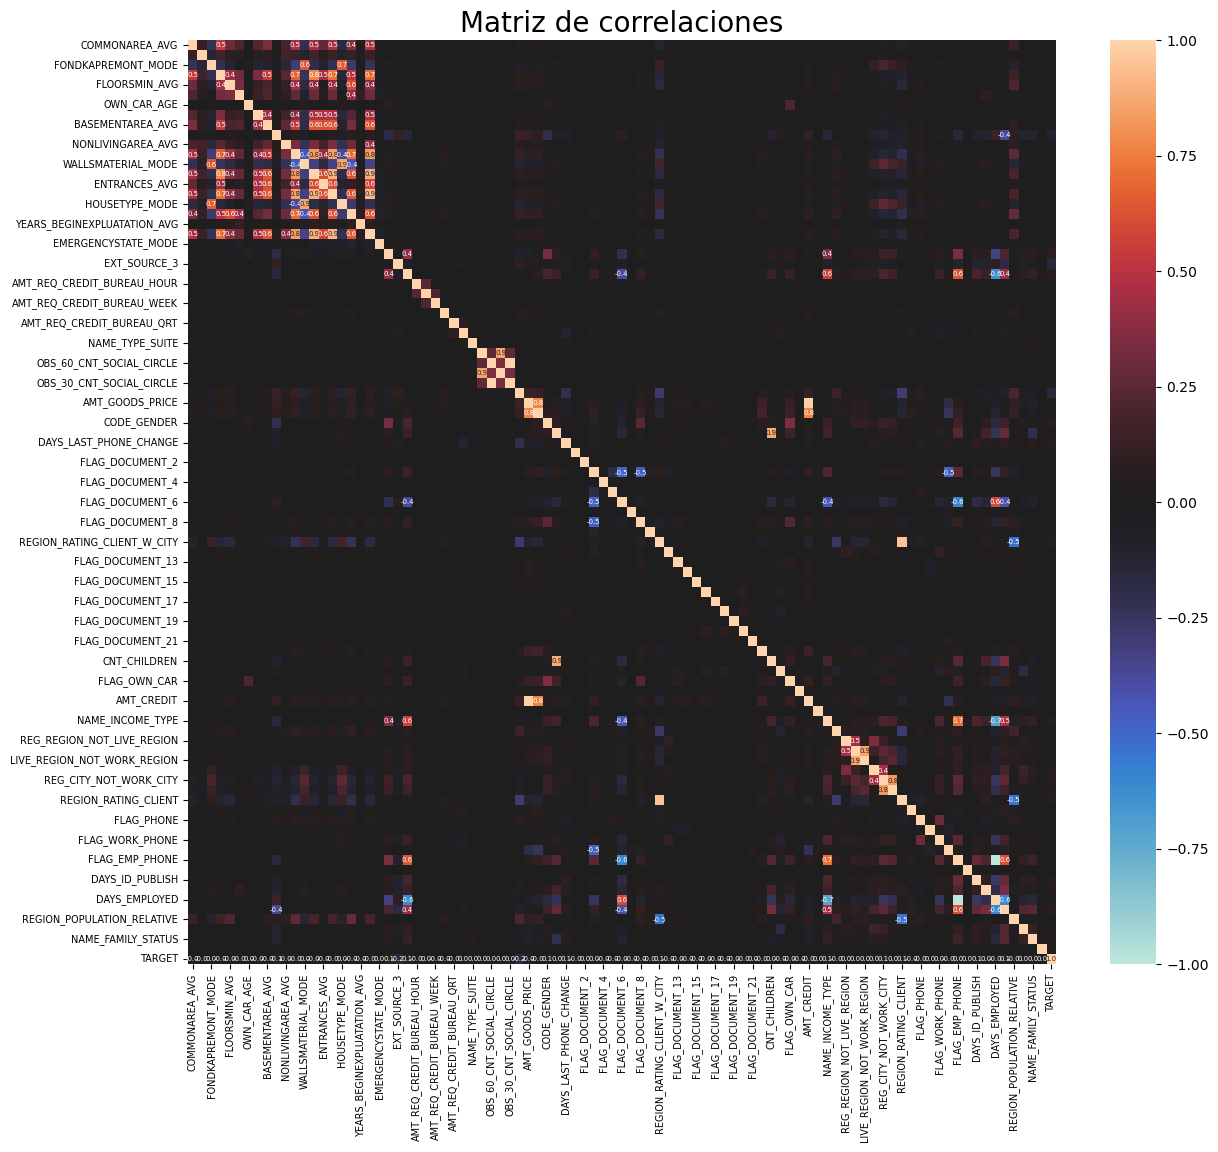

In [23]:
f.plot_correlation_heatmap(corr, fontsize=5)

Y revisamos más en detalle las correlaciones con la variable Target.

In [24]:
corr.loc['TARGET'].sort_values(ascending=False)

TARGET                         1.000000
OCCUPATION_TYPE                0.079874
DAYS_BIRTH                     0.077406
ORGANIZATION_TYPE              0.071142
NAME_INCOME_TYPE               0.062775
REGION_RATING_CLIENT_W_CITY    0.060843
REGION_RATING_CLIENT           0.059180
CODE_GENDER                    0.055434
DAYS_LAST_PHONE_CHANGE         0.055109
REG_CITY_NOT_WORK_CITY         0.052931
DAYS_ID_PUBLISH                0.051954
REG_CITY_NOT_LIVE_CITY         0.045614
WALLSMATERIAL_MODE             0.044720
FLAG_EMP_PHONE                 0.044703
FLAG_DOCUMENT_3                0.044127
DAYS_REGISTRATION              0.043475
HOUSETYPE_MODE                 0.041517
NAME_FAMILY_STATUS             0.039938
NAME_HOUSING_TYPE              0.036407
LIVE_CITY_NOT_WORK_CITY        0.033572
DEF_30_CNT_SOCIAL_CIRCLE       0.031356
DEF_60_CNT_SOCIAL_CIRCLE       0.030611
FONDKAPREMONT_MODE             0.030068
FLAG_WORK_PHONE                0.027676
CNT_CHILDREN                   0.019716


Las correlaciones observadas se mantienen consistentes con los análisis previos, destacándose de nuevo las variables principales ya mencionadas en el analisis anterior. Entre las correlaciones más significativas con la variable objetivo (TARGET) continuan OCCUPATION_TYPE, DAYS_BIRTH, ORGANIZATION_TYPE, NAME_INCOME_TYPE, REGION_RATING_CLIENT_W_CITY y REGION_RATING_CLIENT

Se mantiene el orden y la importancia de estas variables en línea con lo ya comentado en análisis anteriores. Además, no se han identificado nuevas correlaciones destacadas que no hayan sido ya analizadas previamente. Esto refuerza la coherencia del análisis y valida la importancia de estas variables en el modelo.

## Separación X e y

Volvemos a separar los datos en las variables independientes (X) y la variable dependiente (y). Este proceso se realiza tanto para el conjunto de entrenamiento (Train) como para el de prueba (Test). El objetivo de esto es mantener las variables independientes listas para su escalado o transformación, según los requerimientos de los modelos que utilizaremos más adelante, y garantizar que los datos queden ordenados y preparados para ingresarlos directamente en los modelos en prácticas futuras.

Además, exportaremos a archivos CSV para facilitar su reutilización en otros contextos. 

In [25]:
y_train_t = pd_data_train['TARGET']
X_train_t = pd_data_train.drop('TARGET', axis=1)
y_test_t = pd_data_test['TARGET']
X_test_t = pd_data_test.drop('TARGET', axis=1)

X_train_t.shape,y_train_t.shape,y_test_t.shape,X_test_t.shape

((246008, 92), (246008,), (61503,), (61503, 92))

In [26]:
pd.concat([X_train_t,y_train_t], axis=1).to_csv('../data/pd_data_train_processed.csv') # luego separaré nuevamente en X e y a la hora de modelar.
pd.concat([X_test_t,y_test_t], axis=1).to_csv('../data/pd_data_test_processed.csv') # lo mismo aplica para el test, se separará luego para no guardar dos csv separados.

## Escalado de variables

In [28]:
scaler = StandardScaler()
model_scaled = scaler.fit(X_train_t)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_t), columns=X_train_t.columns, index=X_train_t.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_t), columns=X_test_t.columns, index=X_test_t.index)

In [ ]:
X_train_scaled.describe()

,COMMONAREA_AVG,NONLIVINGAPARTMENTS_AVG,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_AVG,FLOORSMIN_AVG,YEARS_BUILD_AVG,OWN_CAR_AGE,LANDAREA_AVG,BASEMENTAREA_AVG,EXT_SOURCE_1,NONLIVINGAREA_AVG,ELEVATORS_AVG,WALLSMATERIAL_MODE,APARTMENTS_AVG,ENTRANCES_AVG,LIVINGAREA_AVG,HOUSETYPE_MODE,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CODE_GENDER,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,AMT_CREDIT,CNT_CHILDREN,FLAG_OWN_REALTY,DAYS_REGISTRATION,DAYS_ID_PUBLISH,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_BIRTH,NAME_FAMILY_STATUS,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,FLAG_PHONE,FLAG_EMAIL,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_11,FLAG_DOCUMENT_10,FLAG_DOCUMENT_9,FLAG_DOCUMENT_8,FLAG_DOCUMENT_7,FLAG_DOCUMENT_6,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,1.007060e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05
mean,6.354241e-17,-5.054510e-18,-4.778230e-15,1.816519e-16,7.847559e-16,-2.675558e-15,-6.583138e-17,-3.947428e-16,-6.194735e-16,-3.041443e-16,5.864675e-17,-4.030971e-17,3.972483e-17,3.532127e-16,7.000785e-16,-1.713695e-16,2.543458e-15,-1.318353e-15,-4.863868e-15,3.438727e-16,-1.517797e-17,-5.814997e-16,3.493388e-17,-9.550351e-16,8.198053e-17,1.202973e-17,-6.016311e-17,-3.273878e-17,-4.332437e-19,-5.152711e-17,-1.999347e-15,-4.199575e-17,2.630060e-17,1.354609e-17,-2.743877e-18,-8.940128e-16,-9.246142e-17,5.259578e-17,1.149395e-15,1.680119e-16,-2.316771e-17,1.422195e-16,8.617357e-15,-1.355114e-16,-3.567401e-16,5.688489e-17,-6.482047e-17,6.960782e-17,-2.993714e-17,-1.534405e-16,-6.365794e-17,6.816367e-17,6.122672e-16,1.200807e-16,6.412006e-18,3.360527e-17,-2.018183e-15,-9.621620e-19,6.619314e-16,-7.203783e-17,-7.890089e-17,-1.325726e-17,1.587116e-17,-6.110180e-17,-1.012202e-16,4.972193e-17,3.631882e-16,1.640405e-16,6.310916e-18,9.888787e-17,-1.010902e-17,2.633761e-17,-4.404644e-18,2.183548e-17,4.384787e-18,7.781779e-17,-1.698315e-17,-1.276264e-18,5.336118e-18,-2.263698e-17,-1.109465e-17,-1.040218e-16,-6.

# Conclusión General del Análisis Exploratorio de Datos (EDA)

El análisis exploratorio de datos (EDA) realizado sobre el dataset application_data, que representa solicitudes de préstamos, ha cumplido con los objetivos planteados al inicio. Este proceso ha permitido comprender la naturaleza de las variables, identificar patrones clave, y preparar los datos para la construcción de modelos predictivos que busquen responder a la pregunta central: ¿Hay algún tipo de cliente más propensos a incumplir con el pago de un préstamo?.


A lo largo de este análisis hemos llevado a cabo los siguientes pasos:

- Comprensión del Dataset: El dataset contiene información financiera, demográfica y laboral de clientes al momento de la solicitud del préstamo.
Confirmamos que las variables disponibles se alinean con el propósito de predicción sin incluir información que dependa de eventos futuros.

- Distribución de la Variable Objetivo: Hemos identificado un desbalance significativo en la variable objetivo (TARGET), donde los casos positivos (incumplimiento) representan una minoría frente a los casos negativos.

- Análisis de Valores Faltantes y Outliers: Hemos detectado variables con altos porcentajes de valores faltantes, como FONDKAPREMONT_MODE y WALLSMATERIAL_MODE, para las cuales implementamos estrategias de imputación o eliminación según su relevancia. Se analizaron y trataron outliers en variables como AMT_INCOME_TOTAL y DAYS_EMPLOYED, eliminando aquellos que no representaban datos reales o ajustándolos según el caso.

- Exploración Descriptiva y Gráfica: Hemos evaluado las distribuciones y relaciones entre las variables, destacando patrones importantes, como por ejemplo: EXT_SOURCE_1, EXT_SOURCE_2 y EXT_SOURCE_3 mostraron una correlación negativa significativa con TARGET, siendo indicadores externos de riesgo crediticio.
Y DAYS_BIRTH (edad) y OCCUPATION_TYPE (ocupación) se destacaron por su relación directa con el comportamiento de pago.
Por eso mismo podemos responder que sí hay un un tipo de cliente más propenso a incumplir el pago del préstamo, y suelen ser personas más jóvenes, con menos estudios, o menos ingresos, es decir que el cliente con menos poder adquisitivo es más propenso al impago.

- Correlaciones y Reducción de Dimensionalidad: Aunque las correlaciones entre variables numéricas y la variable objetivo fueron en general bajas, se identificaron algunas significativas para el análisis, como REGION_RATING_CLIENT_W_CITY y NAME_INCOME_TYPE.
Las correlaciones altas entre variables numéricas indicaron redundancias que podrían ser tratadas para mejorar la eficiencia del modelo y evitar multicolinealidad.

- Codificación y Escalado de Variables: Las variables categóricas fueron codificadas según su naturaleza y número de categorías mediante técnicas como Ordinal Encoding y Target Encoding.

- Preparación del Dataset para Modelado: Hemos separado las variables independientes (X) de la dependiente (y), y se dividieron los datos en conjuntos de Train y Test de forma estratificada, asegurando representatividad. Tambien hemos completado todas las transformaciones necesarias y escalado para que los datos estén listos para alimentar modelos de aprendizaje automático.


Cosas a tener en cuenta para el momento del modelado: 

- El desbalance en la variable objetivo deberá ser mitigado con técnicas como sobremuestreo, submuestreo o asignación de pesos para evitar sesgos en los modelos.

- Los indicadores externos de riesgo (EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3), edad (DAYS_BIRTH) y ocupación (OCCUPATION_TYPE) serán fundamentales para la predicción.

- Se podría explorar el uso de técnicas avanzadas como Mean Encoding en variables categóricas relevantes para mejorar la capacidad predictiva.


Para concluir, este EDA ha proporcionado una base sólida para el desarrollo de modelos predictivos. Hemos logrado averiguar cual es el cliente más propenso a inclumplir los pagos, personas con poder adquisitivo menor, pero hasta que no llevemos a cabo el modelo, no podremos verificar cúales son exáctamente los factores determinantes. Estas son las variables con más impacto con la variable Target, y están se pueden llegar a relacionar con el capital que tiene el cliente.

EXT_SOURCE_2    0.077055
EXT_SOURCE_3    0.059678
DAYS_BIRTH    0.049013
DAYS_ID_PUBLISH    0.048686
DAYS_REGISTRATION    0.046729
DAYS_EMPLOYED    0.043846
AMT_ANNUITY    0.040105
DAYS_LAST_PHONE_CHANGE    0.039544
EXT_SOURCE_1    0.034334
REGION_POPULATION_RELATIVE    0.033735
AMT_INCOME_TOTAL    0.031671
AMT_CREDIT    0.030357
HOUR_APPR_PROCESS_START    0.029373
ORGANIZATION_TYPE    0.025392
AMT_GOODS_PRICE    0.023749
OWN_CAR_AGE    0.018175
OCCUPATION_TYPE 